# Moment-Curvature Verification
This file verifies the Moment-Curvature implementation provided in the file "mkappa.py"


In [1]:
#%matplotlib widget

In [2]:
from bmcs_cross_section.mkappa.mkappa import MKappa
from bmcs_utils.api import InteractiveWindow
from bmcs_cross_section.cs_design.cs_shape import TShapeCS
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
sp.init_printing()

In [3]:
def plot(mc):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    mc.plot_mk_and_stress_profile(ax1, ax2)
    plt.show()

def plot_ver(mc, ver_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    mc.plot_mk_and_stress_profile(ax1, ax2)
    k = ver_data[0]
    m = ver_data[1]
    
    ax1.plot(k,m)
    plt.show()

## 1. Checking the model with its default parameters

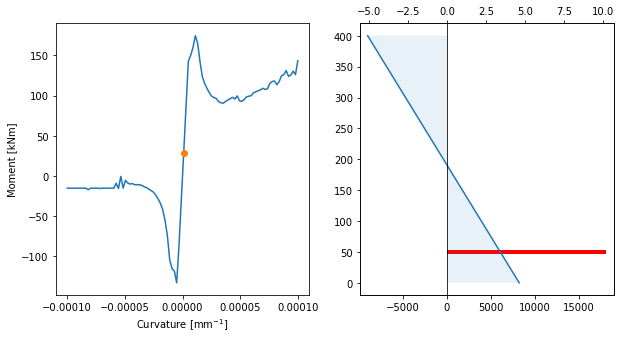

In [4]:
mc = MKappa()
plot(mc)

## 2. Verification with experimental results

Verification with experimental results from multiple papers using the summarized parameters in Table 3 in [Yao_Mobasher2019](https://doi.org/10.1002/suco.201900404)

Notation in [Yao_Mobasher2019](https://doi.org/10.1002/suco.201900404) | Notation in this file
----------- | -----------
$E$      | E_ct
$E_c$   | E_cc
$E_s$ | E_j
$\varepsilon_{cr}$ | eps_cr
$\varepsilon_{cu}$ | eps_cu
$\varepsilon_{tu}$ | eps_tu
$\varepsilon_{cy}$ | eps_cy
$\mu$ | mu
$\gamma$  | E_cc/E_ct
$\omega$  | eps_cy/eps_cr
$\lambda_{cu}$  | eps_cu/eps_cr
$\beta_{tu}$  | eps_tu/eps_cr
$\psi$  | eps_sy_j/eps_cr
$n$  | E_j/E_ct
$\alpha$  | z_j/h
$r$  | A_s_c/A_s_t
$\rho_g$ | A_j[0]/A_c, where A_j[0] must be tension steel area

### Verification with Rectangluar cross sections
In the following verifications, the parameters will be taken from the parameters summary in Table 3 in [Yao_Mobasher2019](https://doi.org/10.1002/suco.201900404)
And the following functions is provided to map the params in the format used in [Yao_Mobasher2019](https://doi.org/10.1002/suco.201900404) to the format of the MKappa model

In [75]:
def map_and_assign_params_for_rectangular_section(
        mc, # MKappa instance for which the params should be applied
        b, h, E, E_s, f_sy, eps_cr, rho, beta_tu, v_f, omega, psi, mu, alpha, lambda_cu):
    """This function map the params of the rectangular section from the type of the paper
    to the type of the model and assigns the values"""
    mc.cross_section_shape.B=b
    mc.cross_section_shape.H=h
    mc.E_cc=E
    mc.E_ct=E # SUPPOSED equal to E_cc!!
    mc.mu=mu
    mc.eps_cr=eps_cr
    mc.eps_cy=omega * eps_cr
    mc.eps_cu=lambda_cu * eps_cr
    mc.eps_tu=beta_tu * eps_cr
    mc.eps_sy_j=[f_sy / E_s] # or eps_sy_j=psi * eps_cr,
    mc.E_j=[E_s]
    mc.z_j=[h * (1 - alpha)]
    mc.A_j=[rho * b * h]

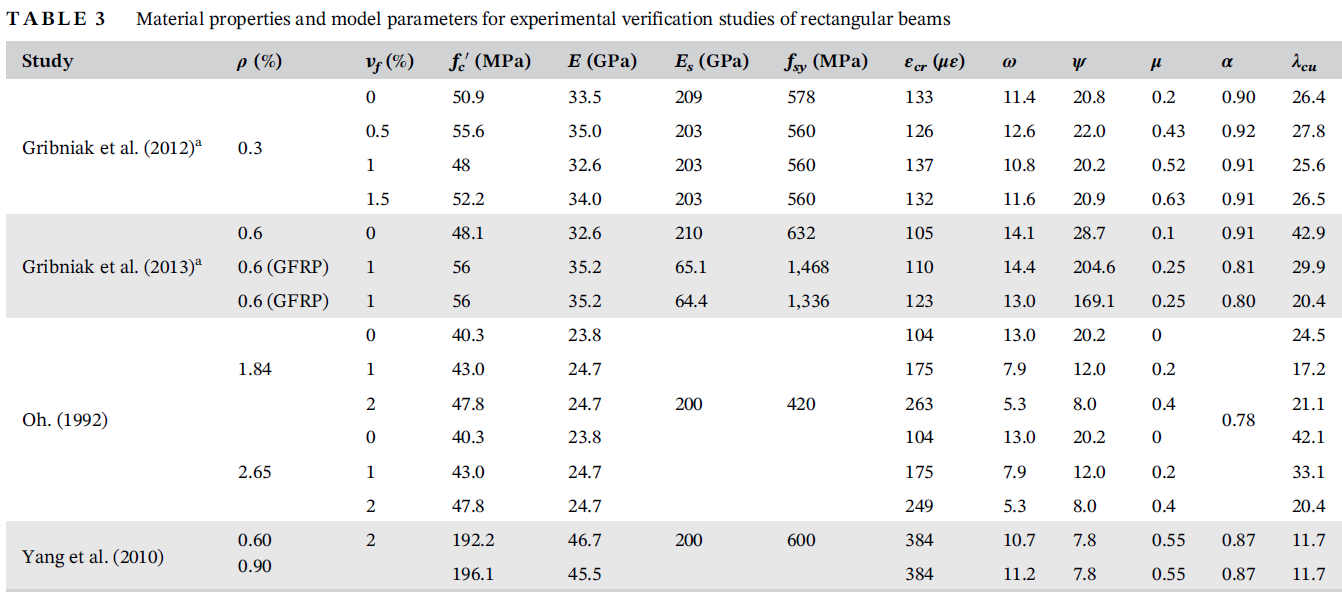

#### 1. Verification with Yang et al. (2010), http://dx.doi.org/10.1016/j.engstruct.2010.07.017
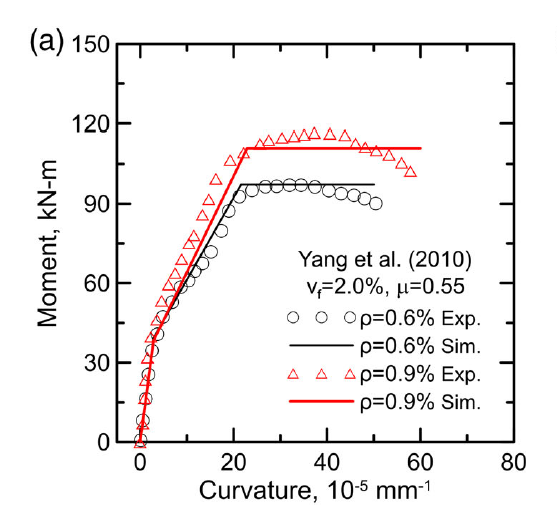

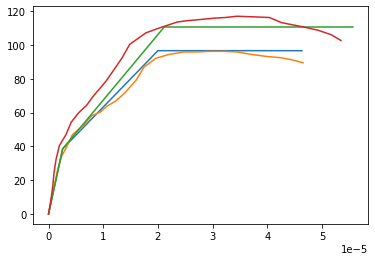

In [142]:
excel_file = r".\verification_data\yao20_yao_mobasher\figure_12\yang_2010.xlsx"
data = pd.read_excel(excel_file)
k= data['rho_06_exp_K'] * 1e-5; m= data['rho_06_exp_M']; ver_data = [k, m]; plt.plot(k,m)
k1= data['rho_06_sim_K'] * 1e-5; m1= data['rho_06_sim_M']; ver_data1 = [k1, m1]; plt.plot(k1,m1)
k2= data['rho_09_exp_K'] * 1e-5; m2= data['rho_09_exp_M']; ver_data2 = [k2, m2]; plt.plot(k2,m2)
k3= data['rho_09_sim_K'] * 1e-5; m3= data['rho_09_sim_M']; ver_data3 = [k3, m3]; plt.plot(k3,m3)

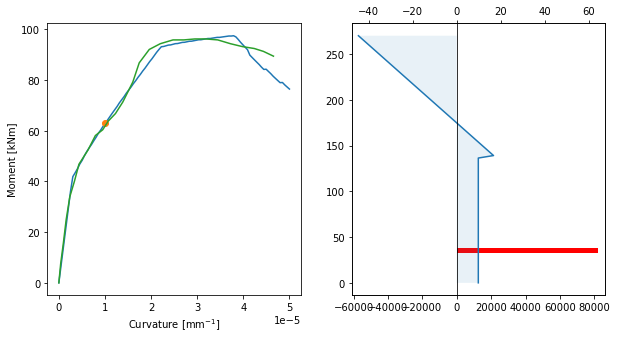

In [144]:
mc = MKappa(n_m=100, n_kappa = 100)
mc.kappa_slider = 0.00001
mc.low_kappa = 0
mc.high_kappa = 0.00005
map_and_assign_params_for_rectangular_section(mc,
    beta_tu = 21,  # SUPPOSED because it's missing
        b = 180,
        h = 270,
        E = 46418, # 46418
        E_s = 200000,
        f_sy = 700, # source?
        eps_cr = 0.000384,
        rho = 0.006,
        v_f = 0.02,
        omega = 10.7,
        psi = 7.8,
        mu = 0.55,
        alpha = 0.87,
        lambda_cu = 11.7)

# plot(mc)
plot_ver(mc, ver_data1)

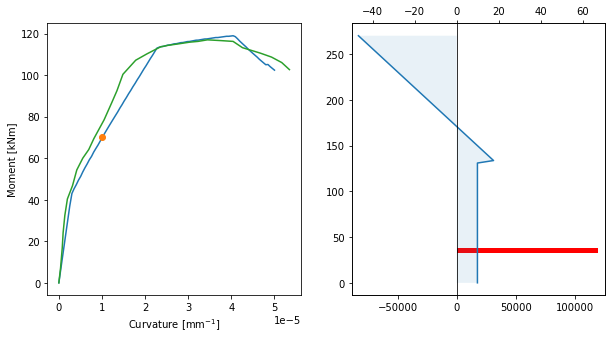

In [145]:
mc = MKappa(n_m=100, n_kappa = 100)
mc.kappa_slider = 0.00001
mc.low_kappa = 0
mc.high_kappa = 0.00005
map_and_assign_params_for_rectangular_section(mc,
    beta_tu = 22,  # SUPPOSED because it's missing
        b = 180,
        h = 270,
        E = 46700,
        E_s = 200000,
        f_sy = 700, # where is the source of 600?!
        eps_cr = 0.000384,
        rho = 0.009,
        v_f = 0.02,
        omega = 10.7,
        psi = 7.8,
        mu = 0.55,
        alpha = 0.87,
        lambda_cu = 11.7)
# plot(mc)
plot_ver(mc, ver_data3)

#### 2. Verification with Gribniak et al. (2012), https://doi.org/10.1016/j.engstruct.2012.04.032
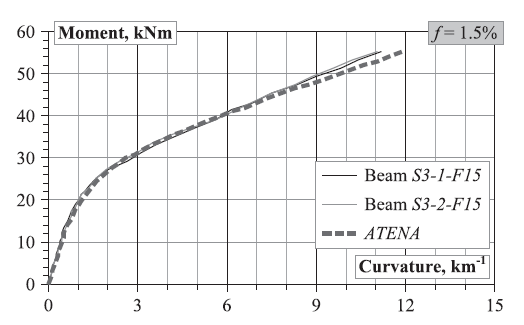

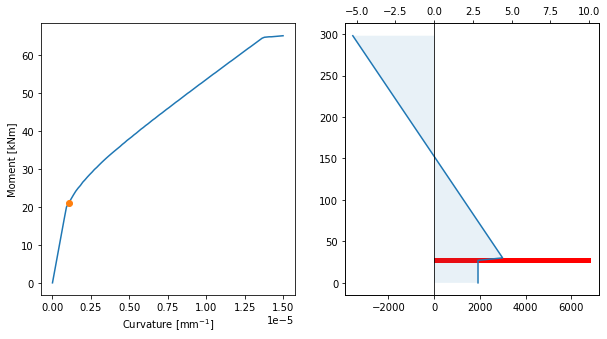

In [146]:
mc = MKappa(n_m=100, n_kappa = 100)
mc.kappa_slider = 0.000001
mc.low_kappa = 0
mc.high_kappa = 15e-6
map_and_assign_params_for_rectangular_section(mc,
    beta_tu = 160,  # SUPPOSED because it's missing
        b = 284,
        h = 298,
        E = 34000,
        E_s = 203000,
        f_sy = 560,
        eps_cr = 0.000132,
        rho = 0.003,
        v_f = 0.015,
        omega = 11.6,
        psi = 20.9,
        mu = 0.63,
        alpha = 0.91,
        lambda_cu = 26.5)
plot(mc)

### Verification with T-sections
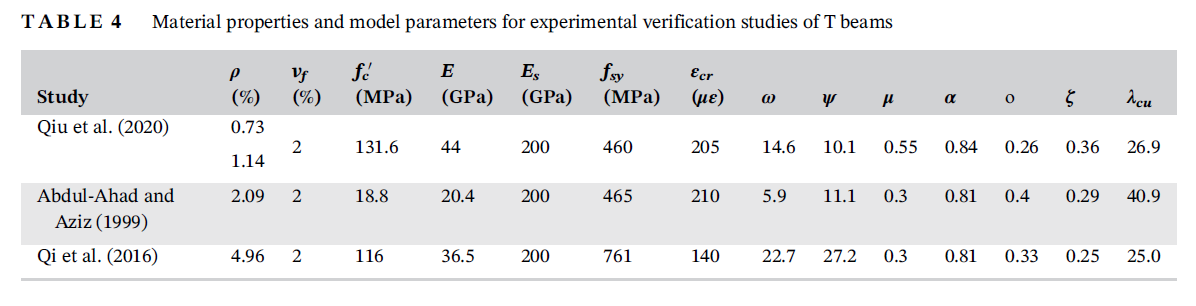

In [10]:
def map_and_assign_params_for_t_section(
        mc, # MKappa instance for which the params should be applied
        b, h, E, E_s, f_sy, eps_cr, rho, beta_tu, v_f, omega, psi, mu, alpha, lambda_cu, o, zeta):
    """This function map the params of the rectangular section from the type of the paper
    to the type of the model and assigns the values"""
    t_shape = TShapeCS(B_f = b, B_w = o*b, H_w = (1-zeta)*h)
    mc.cross_section_shape = t_shape
    
    mc.E_cc=E
    mc.E_ct=E # SUPPOSED equal to E_cc!!
    mc.mu=mu
    mc.eps_cr=eps_cr
    mc.eps_cy=omega * eps_cr
    mc.eps_cu=lambda_cu * eps_cr
    mc.eps_tu=beta_tu * eps_cr
    mc.eps_sy_j=[f_sy / E_s] # or eps_sy_j=psi * eps_cr,
    mc.E_j=[E_s]
    mc.z_j=[h * (1 - alpha)]
    mc.A_j=[rho * b * h]

#### 1. Verification with Qi et al. (2016), https://doi.org/10.1002/suco.201500191

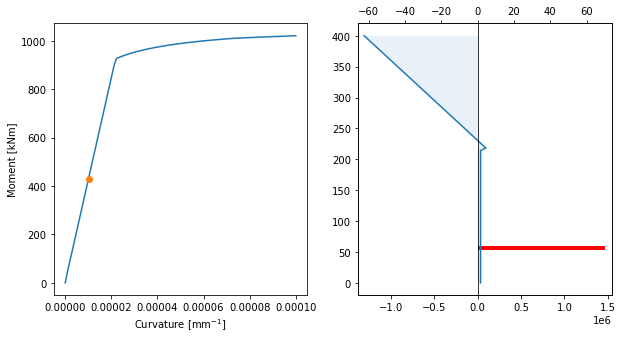

In [11]:
mc = MKappa(n_m=100, n_kappa = 100)
mc.kappa_slider = 0.00001
mc.low_kappa = 0
mc.high_kappa = 0.0001
map_and_assign_params_for_t_section(mc,
            beta_tu = 160,  # SUPPOSED because it's missing
            b = 284,
            h = 298,
            E = 36500,
            E_s = 200000,
            f_sy = 761,
            eps_cr = 0.000140,
            rho = 0.0496,
            v_f = 0.02,
            omega = 22.7,
            psi = 27.2,
            mu = 0.3,
            alpha = 0.81,
            lambda_cu = 25, 
            o = 0.33, 
            zeta = 0.25)
plot(mc)

# Verify and demonstrate the interactive model of M-k relation

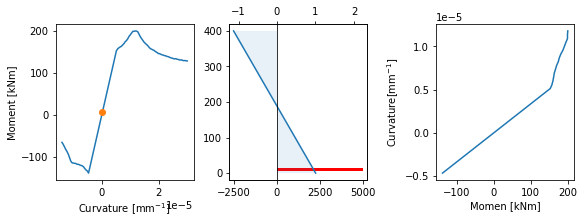

In [12]:
mc = MKappa(low_kappa=-0.000014, high_kappa=0.00003)
bd = mc.beam_design
css = bd.cross_section_shape
csl = bd.cross_section_layout
csl.reinforcement.z_j = [10]
InteractiveWindow([mc, bd, mc.matrix, css, csl]).interact()

In [13]:
xdata = np.array([0,1,0.9, 0.8, 2])
ydata = np.array([0,1,2,3, 4])

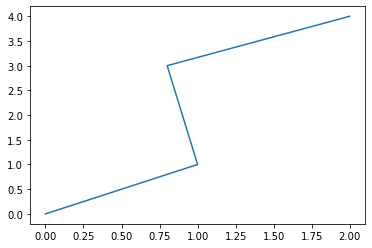

In [14]:
plt.plot(xdata, ydata)
plt.show()

In [15]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [16]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [17]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [18]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [19]:
i_x = np.argmin(diffs, axis=1)

In [20]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

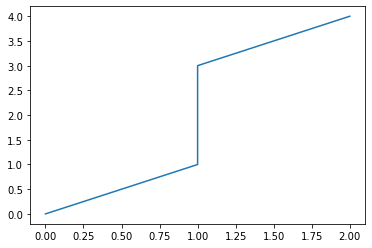

In [21]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [22]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [23]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [24]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [25]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [26]:
i_x = np.argmin(diffs, axis=1)

In [27]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

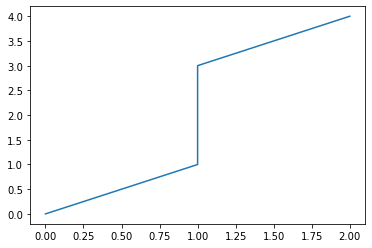

In [28]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [29]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [30]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [31]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [32]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [33]:
i_x = np.argmin(diffs, axis=1)

In [34]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

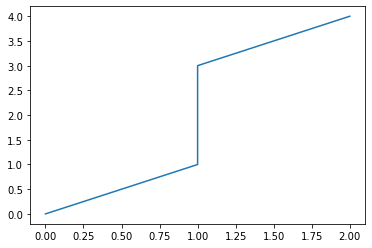

In [35]:
plt.plot(xdata[i_x], ydata)
plt.show()